In [1]:
import netCDF4 as nc
from netCDF4 import num2date,date2index
import datetime
import csv
import numpy as np
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from tensorflow.keras.initializers import glorot_uniform
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
data = nc.Dataset('Vwind.nc')

In [3]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    description: Data is from NMC initialized reanalysis
(4x/day).  It consists of T62 variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    NCO: 20121013
    title: monthly mean vwnd.10m from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 11-Dec-2023 06:47:32 Subset NOAA/PSL  
    dimensions(sizes): time(708), lon(192), lat(94)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 vwnd(time, lat, lon)
    groups: 

In [4]:
air = data.variables['vwnd']
print(air)

<class 'netCDF4._netCDF4.Variable'>
float32 vwnd(time, lat, lon)
    long_name: Monthly Mean V wind at 10 m
    units: m/s
    CDI_grid_type: gaussian
    CDI_grid_num_LPE: 47
    _FillValue: -9.96921e+36
    missing_value: -9.96921e+36
    precision: 2
    least_significant_digit: 1
    GRIB_id: 11
    var_desc: v-wind
    level_desc: 10 m
    statistic: Mean
    parent_stat: Individual Obs
    dataset: NCEP Reanalysis Derived Products
    actual_range: [-13.041287  14.949664]
unlimited dimensions: time
current shape = (708, 94, 192)
filling off


In [5]:
latitude = data.variables['lat']
print(latitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
    actual_range: [ 88.542 -88.542]
unlimited dimensions: 
current shape = (94,)
filling off


In [6]:
latitude[:].shape

(94,)

In [7]:
longitude = data.variables['lon']
print(longitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
    actual_range: [  0.    358.125]
unlimited dimensions: 
current shape = (192,)
filling off


In [8]:
longitude[:]

masked_array(data=[  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,
                    11.25 ,  13.125,  15.   ,  16.875,  18.75 ,  20.625,
                    22.5  ,  24.375,  26.25 ,  28.125,  30.   ,  31.875,
                    33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
                    45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,
                    56.25 ,  58.125,  60.   ,  61.875,  63.75 ,  65.625,
                    67.5  ,  69.375,  71.25 ,  73.125,  75.   ,  76.875,
                    78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,
                    90.   ,  91.875,  93.75 ,  95.625,  97.5  ,  99.375,
                   101.25 , 103.125, 105.   , 106.875, 108.75 , 110.625,
                   112.5  , 114.375, 116.25 , 118.125, 120.   , 121.875,
                   123.75 , 125.625, 127.5  , 129.375, 131.25 , 133.125,
                   135.   , 136.875, 138.75 , 140.625, 142.5  , 144.375,
                   146.25 , 148.125, 150.   , 151.8

In [9]:
time = data.variables['time']
time_ = time[:]
time_units = time.units
time_calendar = time.calendar
time_dates = num2date(time_, units=time_units, calendar=time_calendar)
start_date = datetime.datetime(1958, 1, 1)
start_index = date2index(start_date, time, select='nearest')
air_subset = data['vwnd'][start_index:, :, :]

In [10]:
data_ = np.array(air_subset)
data_[data_ == -9.96921e+36] = 0

In [11]:
for date in time_dates:
    print(date)

1958-01-01 00:00:00
1958-02-01 00:00:00
1958-03-01 00:00:00
1958-04-01 00:00:00
1958-05-01 00:00:00
1958-06-01 00:00:00
1958-07-01 00:00:00
1958-08-01 00:00:00
1958-09-01 00:00:00
1958-10-01 00:00:00
1958-11-01 00:00:00
1958-12-01 00:00:00
1959-01-01 00:00:00
1959-02-01 00:00:00
1959-03-01 00:00:00
1959-04-01 00:00:00
1959-05-01 00:00:00
1959-06-01 00:00:00
1959-07-01 00:00:00
1959-08-01 00:00:00
1959-09-01 00:00:00
1959-10-01 00:00:00
1959-11-01 00:00:00
1959-12-01 00:00:00
1960-01-01 00:00:00
1960-02-01 00:00:00
1960-03-01 00:00:00
1960-04-01 00:00:00
1960-05-01 00:00:00
1960-06-01 00:00:00
1960-07-01 00:00:00
1960-08-01 00:00:00
1960-09-01 00:00:00
1960-10-01 00:00:00
1960-11-01 00:00:00
1960-12-01 00:00:00
1961-01-01 00:00:00
1961-02-01 00:00:00
1961-03-01 00:00:00
1961-04-01 00:00:00
1961-05-01 00:00:00
1961-06-01 00:00:00
1961-07-01 00:00:00
1961-08-01 00:00:00
1961-09-01 00:00:00
1961-10-01 00:00:00
1961-11-01 00:00:00
1961-12-01 00:00:00
1962-01-01 00:00:00
1962-02-01 00:00:00


In [12]:
data_

array([[[-1.4929032 , -1.430321  , -1.3654824 , ..., -1.6870934 ,
         -1.62032   , -1.5587075 ],
        [-1.5558048 , -1.512902  , -1.4638692 , ..., -1.6525791 ,
         -1.623547  , -1.5906432 ],
        [-2.166773  , -2.1119325 , -2.032579  , ..., -2.266128  ,
         -2.2525797 , -2.223869  ],
        ...,
        [-2.8790312 , -2.9438698 , -2.9948366 , ..., -2.6635466 ,
         -2.7425802 , -2.8193536 ],
        [-2.3087094 , -2.3729007 , -2.433223  , ..., -2.0841925 ,
         -2.1648378 , -2.2345147 ],
        [-1.6467713 , -1.6641924 , -1.6809658 , ..., -1.5806437 ,
         -1.608708  , -1.6322563 ]],

       [[-0.8264269 , -0.80321175, -0.7767852 , ..., -0.91606957,
         -0.88321143, -0.84821373],
        [-0.7364268 , -0.74857   , -0.7660691 , ..., -0.677857  ,
         -0.686427  , -0.7092852 ],
        [-0.99285614, -1.036069  , -1.0657136 , ..., -0.81892616,
         -0.887855  , -0.9464264 ],
        ...,
        [-2.199641  , -2.1664271 , -2.1453557 , ..., -

In [13]:
np.max(data_)

14.949664

In [14]:
np.min(data_)

-13.041287

In [15]:
data_.shape

(708, 94, 192)

In [16]:
len(data_)

708

In [17]:
num_years = data_.shape[0] // 12
num_months = data_.shape[0] // num_years

In [18]:
num_years

59

In [19]:
num_months

12

In [34]:
data_reshaped = np.reshape(data_, (len(data_) // 12, 12, data_.shape[1],data_.shape[2]))

In [20]:
lat_indices = []
for start_value in np.arange(90, -90, -10):  # Changed step to -10 for descending order
    end_value = start_value - 10  # Adjusted end_value calculation

    # Get indices within the range
    range_indices = np.where((latitude <= start_value) & (latitude > end_value))[0]

    if len(range_indices) > 0:  # Check if any values are within the range
        # Get indices of largest and smallest values
        min_index = range_indices[np.argmax(latitude[range_indices])]
        max_index = range_indices[np.argmin(latitude[range_indices])]
        
        lat_indices.append(min_index)
        lat_indices.append(max_index)

        print(f"Range {start_value} to {end_value}: Min index = {min_index}, Max index = {max_index}, Min = {latitude[min_index]}, Max = {latitude[max_index]}")
    else:
        print(f"No values found in range {start_value} to {end_value}")

Range 90 to 80: Min index = 0, Max index = 4, Min = 88.54199981689453, Max = 80.94730377197266
Range 80 to 70: Min index = 5, Max index = 9, Min = 79.04350280761719, Max = 71.42620086669922
Range 70 to 60: Min index = 10, Max index = 14, Min = 69.52169799804688, Max = 61.90330123901367
Range 60 to 50: Min index = 15, Max index = 20, Min = 59.998600006103516, Max = 50.47520065307617
Range 50 to 40: Min index = 21, Max index = 25, Min = 48.570499420166016, Max = 40.951698303222656
Range 40 to 30: Min index = 26, Max index = 30, Min = 39.047000885009766, Max = 31.4281005859375
Range 30 to 20: Min index = 31, Max index = 35, Min = 29.523399353027344, Max = 21.904399871826172
Range 20 to 10: Min index = 36, Max index = 41, Min = 19.99970054626465, Max = 10.47603988647461
Range 10 to 0: Min index = 42, Max index = 46, Min = 8.571310043334961, Max = 0.9523680210113525
Range 0 to -10: Min index = 47, Max index = 51, Min = -0.9523680210113525, Max = -8.571310043334961
Range -10 to -20: Min inde

In [21]:
lat_indices

[0,
 4,
 5,
 9,
 10,
 14,
 15,
 20,
 21,
 25,
 26,
 30,
 31,
 35,
 36,
 41,
 42,
 46,
 47,
 51,
 52,
 57,
 58,
 62,
 63,
 67,
 68,
 72,
 73,
 78,
 79,
 83,
 84,
 88,
 89,
 93]

In [22]:
len(lat_indices)

36

In [23]:
lon_indices = []
for start_value in np.arange(0, 360, 20):  # Changed step to -10 for descending order
    end_value = start_value + 20  # Adjusted end_value calculation

    # Get indices within the range
    range_indices = np.where((longitude >= start_value) & (longitude < end_value))[0]

    if len(range_indices) > 0:  # Check if any values are within the range
        # Get indices of largest and smallest values
        min_index = range_indices[np.argmin(longitude[range_indices])]
        max_index = range_indices[np.argmax(longitude[range_indices])]
        
        lon_indices.append(min_index)
        lon_indices.append(max_index)

        print(f"Range {start_value} to {end_value}: Min index = {min_index}, Max index = {max_index}, Min = {longitude[min_index]}, Max = {longitude[max_index]}")
    else:
        print(f"No values found in range {start_value} to {end_value}")

Range 0 to 20: Min index = 0, Max index = 10, Min = 0.0, Max = 18.75
Range 20 to 40: Min index = 11, Max index = 21, Min = 20.625, Max = 39.375
Range 40 to 60: Min index = 22, Max index = 31, Min = 41.25, Max = 58.125
Range 60 to 80: Min index = 32, Max index = 42, Min = 60.0, Max = 78.75
Range 80 to 100: Min index = 43, Max index = 53, Min = 80.625, Max = 99.375
Range 100 to 120: Min index = 54, Max index = 63, Min = 101.25, Max = 118.125
Range 120 to 140: Min index = 64, Max index = 74, Min = 120.0, Max = 138.75
Range 140 to 160: Min index = 75, Max index = 85, Min = 140.625, Max = 159.375
Range 160 to 180: Min index = 86, Max index = 95, Min = 161.25, Max = 178.125
Range 180 to 200: Min index = 96, Max index = 106, Min = 180.0, Max = 198.75
Range 200 to 220: Min index = 107, Max index = 117, Min = 200.625, Max = 219.375
Range 220 to 240: Min index = 118, Max index = 127, Min = 221.25, Max = 238.125
Range 240 to 260: Min index = 128, Max index = 138, Min = 240.0, Max = 258.75
Range 2

In [24]:
lon_indices

[0,
 10,
 11,
 21,
 22,
 31,
 32,
 42,
 43,
 53,
 54,
 63,
 64,
 74,
 75,
 85,
 86,
 95,
 96,
 106,
 107,
 117,
 118,
 127,
 128,
 138,
 139,
 149,
 150,
 159,
 160,
 170,
 171,
 181,
 182,
 191]

In [26]:
len(lon_indices)

36

In [27]:
for lat_idx in range(0, len(lat_indices), 2):
    lat_range_start = lat_indices[lat_idx]
    lat_range_end = lat_indices[lat_idx + 1]
    print(lat_range_start,lat_range_end)

0 4
5 9
10 14
15 20
21 25
26 30
31 35
36 41
42 46
47 51
52 57
58 62
63 67
68 72
73 78
79 83
84 88
89 93


In [28]:
for lon_idx in range(0, len(lon_indices),2):
    lon_range_start = lon_indices[lon_idx]
    lon_range_end = lon_indices[lon_idx + 1]
    print(lon_range_start,lon_range_end)

0 10
11 21
22 31
32 42
43 53
54 63
64 74
75 85
86 95
96 106
107 117
118 127
128 138
139 149
150 159
160 170
171 181
182 191


In [32]:
def coarse_gridding(data, lat_indices, lon_indices):
    coarsed_data = np.zeros((data.shape[0], data.shape[1], len(lat_indices) // 2, len(lon_indices) // 2))
    for lat_idx in range(0, len(lat_indices), 2):
        lat_range_start = lat_indices[lat_idx]
        lat_range_end = lat_indices[lat_idx + 1]
        for lon_idx in range(0, len(lon_indices), 2):
            lon_range_start = lon_indices[lon_idx]
            lon_range_end = lon_indices[lon_idx + 1]
            subset = data[:, :, lat_range_start:lat_range_end, lon_range_start:lon_range_end]
            averaged_value = np.mean(subset, axis=(2, 3))
            coarsed_data[:, :, lat_idx // 2, lon_idx // 2] = averaged_value
    return coarsed_data


In [35]:
 avg = coarse_gridding(data_reshaped,lat_indices,lon_indices)

In [36]:
avg.shape

(59, 12, 18, 18)

In [37]:
avg[1,1,:,1]

array([-1.37579322, -0.37761432,  0.98259962, -0.7188341 , -2.39035559,
       -3.6570785 , -2.55940938, -3.06712699,  0.72156376, -0.13419506,
       -0.67897719,  0.2955018 ,  0.73510867, -1.17009699, -3.58016276,
       -1.2948916 ,  2.14891195, -3.18188238])

In [43]:
final= np.reshape(avg, (len(data_) // 12, 12, 324))

In [44]:
final.shape

(59, 12, 324)

In [45]:
np.max(final)

10.61324691772461

In [46]:
np.min(final)

-9.84632396697998

In [47]:
ff= final.reshape(324,708)
ff.shape

(324, 708)

In [48]:
def calculate_monthly_anomaliess(data):
    """Calculate monthly anomalies and mean for a given dataset.

    Args:
        data: A multidimensional array with dimensions (years, months, latlon).

    Returns:
        monthly_anomalies: An array with monthly anomalies of the same shape as the input data.
        monthly_mean: A multidimensional array with dimensions (months, latlon) representing the mean for each month.
    """


    anomalies = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomalies[:, j, i] = month - monthly_mean
    return anomalies

def min_max_normalize(data):
    normalized_data = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]

            # Calculate min and max values for each month
            min_value = np.min(month)
            max_value = np.max(month)

            # Normalize each month value
            normalized_month = (month - min_value) / (max_value - min_value)

            # Store normalized month data
            normalized_data[:, j, i] = normalized_month


    return normalized_data




In [49]:
anomalies = calculate_monthly_anomaliess(final)
anomalies

array([[[-0.61842849, -0.04224145,  0.41977062, ...,  0.21886257,
          0.77723606,  0.03453125],
        [ 0.16409761, -0.47422842, -0.83740196, ...,  0.96947426,
          0.98287361,  0.97848601],
        [ 0.49842839, -0.35413977, -1.05812023, ..., -0.13123625,
         -0.16897358, -0.10431352],
        ...,
        [ 0.74166578,  0.67409025,  0.54422327, ...,  0.3723519 ,
          0.15264775, -0.06135368],
        [-0.44587413,  0.03843281,  0.62934187, ...,  0.45526068,
          1.05315812,  1.23521022],
        [ 0.07365013,  0.25072824,  0.11119684, ...,  0.3428079 ,
          0.91871043,  0.95196165]],

       [[-1.8463315 , -2.50595114, -2.39294467, ...,  0.06982226,
          0.13561488,  0.48681606],
        [-1.35814315, -1.06018392, -1.03488205, ...,  0.23898346,
         -0.29985876, -0.87810116],
        [-0.81204797, -1.68636545, -1.66338025, ...,  0.15278775,
         -0.22454609, -0.28190341],
        ...,
        [ 0.81768971,  1.23155786,  1.4624132 , ..., -

In [50]:
np.max((anomalies))

10.43126195893323

In [51]:
np.min((anomalies))

-6.8846317913572666

In [52]:
normalized_data = min_max_normalize(anomalies)

In [53]:
normalized_data

array([[[0.20848224, 0.32852639, 0.45617707, ..., 0.48030234,
         0.85528588, 0.49117609],
        [0.41718784, 0.41832843, 0.37395431, ..., 0.85178817,
         0.72894974, 0.75405632],
        [0.60470888, 0.4645523 , 0.34006932, ..., 0.37410134,
         0.3725322 , 0.33850816],
        ...,
        [0.70595635, 0.67382371, 0.56667777, ..., 0.59660462,
         0.67176271, 0.43439089],
        [0.44984909, 0.49066056, 0.54068982, ..., 0.61872624,
         0.94992318, 0.85793869],
        [0.37616461, 0.5164843 , 0.54904803, ..., 0.68053008,
         0.84759296, 0.82930455]],

       [[0.0290309 , 0.03999494, 0.11592706, ..., 0.42766672,
         0.58996481, 0.62373153],
        [0.18503122, 0.32788736, 0.34768372, ..., 0.55115735,
         0.23868566, 0.02094616],
        [0.40724127, 0.27680572, 0.2467628 , ..., 0.47393738,
         0.35672279, 0.26631741],
        ...,
        [0.72013696, 0.77250223, 0.71873184, ..., 0.43759387,
         0.47807711, 0.30326034],
        [0.5

In [54]:
normalized_data.shape

(59, 12, 324)

In [55]:
np.max(np.abs(anomalies))

10.43126195893323

In [56]:
num_positive_values = np.sum(anomalies > 0)

# Find the number of negative values
num_negative_values = np.sum(anomalies < 0)

# Find the number of zero values (optional)
num_zero_values = np.sum(anomalies == 0)

print("Number of positive values:", num_positive_values)
print("Number of negative values:", num_negative_values)
print("Number of zero values:", num_zero_values)

Number of positive values: 114469
Number of negative values: 114923
Number of zero values: 0


In [57]:
anomalies.shape

(59, 12, 324)

In [64]:
tf.random.set_seed(12345)

In [65]:
input_dim = 324
hidden_dim = 65
input_layer = Input(shape = (input_dim,))
hidden_layer = Dense(hidden_dim,activation='tanh')(input_layer)
output_layer = Dense(input_dim,activation='linear')(hidden_layer)

In [67]:
input_data = normalized_data.reshape(-1, input_dim)
input_data.shape

(708, 324)

In [68]:
input_data

array([[0.20848224, 0.32852639, 0.45617707, ..., 0.48030234, 0.85528588,
        0.49117609],
       [0.41718784, 0.41832843, 0.37395431, ..., 0.85178817, 0.72894974,
        0.75405632],
       [0.60470888, 0.4645523 , 0.34006932, ..., 0.37410134, 0.3725322 ,
        0.33850816],
       ...,
       [0.84803264, 0.8664633 , 0.77546441, ..., 0.56561421, 0.58154168,
        0.3024093 ],
       [0.90055362, 0.89270828, 0.85298858, ..., 0.06241795, 0.12195527,
        0.50309828],
       [0.51273029, 0.78491757, 1.        , ..., 0.22129134, 0.07473777,
        0.5035179 ]])

In [69]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [70]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [71]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 324)]             0         
                                                                 
 dense_4 (Dense)             (None, 65)                21125     
                                                                 
 dense_5 (Dense)             (None, 324)               21384     
                                                                 
Total params: 42,509
Trainable params: 42,509
Non-trainable params: 0
_________________________________________________________________


In [72]:
autoencoder.fit(input_data, input_data, epochs=10
                , batch_size=8)

Epoch 1/10
89/89 [==============================] - 3s 4ms/step - loss: 0.0883
Epoch 2/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 3/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 4/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 5/10
89/89 [==============================] - 0s 5ms/step - loss: 0.0433
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0404
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0379
Epoch 8/10
89/89 [==============================] - 0s 5ms/step - loss: 0.0357
Epoch 9/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0338
Epoch 10/10
89/89 [==============================] - 1s 6ms/step - loss: 0.0320


In [73]:
encoded_data = autoencoder.predict(input_data)

23/23 [==============================] - 0s 2ms/step


In [74]:
encoded_data.shape

(708, 324)

In [75]:
decoded_data = autoencoder.predict(encoded_data)

23/23 [==============================] - 0s 3ms/step


In [76]:
decoded_data.shape

(708, 324)

In [103]:
weights = autoencoder.get_weights()[0]# Get the weights of the first layer (between input and hidden)
weights

array([[ 0.16243687, -0.0250406 ,  0.02965702, ..., -0.02633606,
         0.10013512,  0.00966909],
       [ 0.10795442,  0.00687843,  0.05506488, ...,  0.1328276 ,
         0.06450497, -0.14013645],
       [ 0.0940735 ,  0.10782646, -0.04172583, ..., -0.03876453,
         0.0689003 ,  0.09324193],
       ...,
       [ 0.05265188,  0.10016344, -0.02948892, ...,  0.08072509,
         0.04073691, -0.11536708],
       [ 0.07087548,  0.10168307,  0.06714289, ...,  0.06517801,
        -0.09240054, -0.04136325],
       [-0.10645702, -0.02526607,  0.00985205, ...,  0.0999473 ,
        -0.04838457,  0.08908698]], dtype=float32)

In [78]:
#np.save('weights.npy', weights)

In [79]:
weights = np.load('weights.npy')

In [80]:
weights

array([[ 0.16243687, -0.0250406 ,  0.02965702, ..., -0.02633606,
         0.10013512,  0.00966909],
       [ 0.10795442,  0.00687843,  0.05506488, ...,  0.1328276 ,
         0.06450497, -0.14013645],
       [ 0.0940735 ,  0.10782646, -0.04172583, ..., -0.03876453,
         0.0689003 ,  0.09324193],
       ...,
       [ 0.05265188,  0.10016344, -0.02948892, ...,  0.08072509,
         0.04073691, -0.11536708],
       [ 0.07087548,  0.10168307,  0.06714289, ...,  0.06517801,
        -0.09240054, -0.04136325],
       [-0.10645702, -0.02526607,  0.00985205, ...,  0.0999473 ,
        -0.04838457,  0.08908698]], dtype=float32)

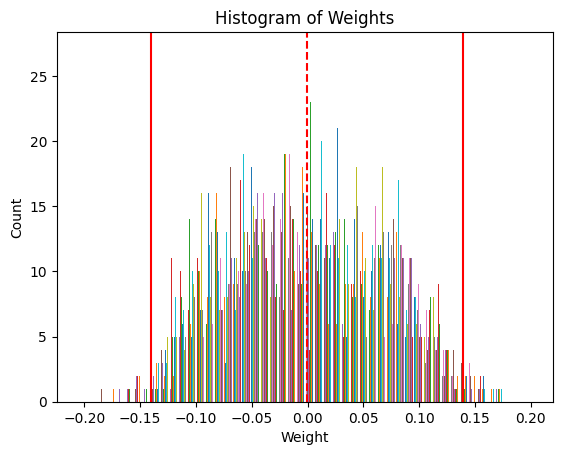

In [81]:
import matplotlib.pyplot as plt
# Calculate the mean and standard deviation of the weights.
mean = np.mean(weights)
sigma = np.std(weights)

# Plot a histogram of the weights.
plt.hist(weights, bins=50)
plt.axvline(mean, color='red', linestyle='dashed')
plt.axvline(mean + 2*sigma, color='red')
plt.axvline(mean - 2*sigma, color='red')
plt.title('Histogram of Weights')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [82]:
weights.shape

(324, 65)

In [93]:
def Tweights(weight):
    num = []

    for i in range(weight.shape[1]):
        weight_mean = np.mean(weight[:, i])
        weight_std = np.std(weight[:, i])
        threshold_upper = weight_mean + 1.4 * weight_std
        threshold_lower = weight_mean - 1.4 * weight_std
        nodes_with_weight_above_upper_threshold = np.sum(weight[:, i] > threshold_upper)
        nodes_with_weight_below_lower_threshold = np.sum(weight[:, i] < threshold_lower)
        ten_percent_nodes = int(0.1 * weight.shape[0])

        if nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold > ten_percent_nodes:
            num.append(nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold)
            print(i, nodes_with_weight_above_upper_threshold, threshold_upper, nodes_with_weight_below_lower_threshold, threshold_lower)

    return num




In [94]:
we = Tweights(weights)
we

0 29 0.09506694775773211 29 -0.09615563648985698
1 26 0.10441074275586287 29 -0.10458949304011184
2 24 0.09233146449550986 30 -0.1028741673566401
3 30 0.09486962710507213 29 -0.09432541574351488
4 26 0.0934729610569775 26 -0.10146247101947664
5 25 0.09681862257421016 19 -0.10822376646101474
6 30 0.09961617905646562 27 -0.09464110415428877
7 23 0.0897778152488172 34 -0.1022865773178637
8 27 0.10283701391890644 27 -0.08968485323712229
9 33 0.09523976440541446 24 -0.09597274367697536
10 22 0.0949363749474287 27 -0.09977700598537921
11 33 0.08740687910467386 28 -0.10903899725526571
12 25 0.09510851074010133 31 -0.11242396365851164
13 35 0.0873039312660694 17 -0.11751482114195823
14 20 0.09627113410388119 27 -0.09696349135483615
15 26 0.10501719061285257 30 -0.08980752881616354
16 27 0.10132164852693676 25 -0.08895924193784593
17 29 0.09840746602903891 26 -0.09839324572194527
18 22 0.09974588161130668 28 -0.0999433308301377
19 23 0.09294743705540895 27 -0.10336323510855436
20 34 0.089712213

[58,
 55,
 54,
 59,
 52,
 44,
 57,
 57,
 54,
 57,
 49,
 61,
 56,
 52,
 47,
 56,
 52,
 55,
 50,
 50,
 57,
 58,
 54,
 54,
 55,
 55,
 52,
 59,
 55,
 53,
 52,
 61,
 57,
 52,
 58,
 52,
 58,
 52,
 58,
 58,
 56,
 52,
 61,
 57,
 55,
 57,
 56,
 55,
 55,
 52,
 58,
 52,
 62,
 54,
 59,
 48,
 54,
 56,
 55,
 60,
 54,
 57,
 57,
 50,
 51]

In [95]:
len(we)

65

In [120]:
pred = np.zeros((65,708))
for i in range(weights.shape[1]):
    weight_mean = np.mean(weights[:,i])
    weight_std = np.std(weights[:,i])
    threshold_upper = weight_mean + 1.4 * weight_std
    threshold_lower = weight_mean - 1.4 * weight_std
    nodes_with_weight_above_upper_threshold = np.sum(weights[:, i] > threshold_upper)
    nodes_with_weight_below_lower_threshold = np.sum(weights[:, i] < threshold_lower)
    ten_percent_nodes = int(0.1 * weights.shape[0])
    if (nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold) > ten_percent_nodes:
        for h in range(input_data.shape[0]): 
            pred_i = 0
            for j in range(weights.shape[0]):
                weight_value = weights[j,i]
                if weight_value > threshold_upper or weight_value < threshold_lower:
                    pp = np.sum(weight_value*input_data[h,j])
                    pred_i += pp
                    pred[i,h] = pred_i
                

print(pred)

[[-0.59002709  0.05961745  0.01444432 ...  0.71198683  0.50375285
   0.199694  ]
 [-0.06112922 -0.31250782  0.29670608 ...  0.30394315  0.35602679
  -0.11781608]
 [-0.31081678 -0.38877765 -0.36722898 ... -0.44531912 -0.6233176
  -0.50425034]
 ...
 [ 0.56212411  0.76329062  0.41582236 ...  0.76230388  0.36723477
   0.98498983]
 [ 0.48981836 -0.03844432 -0.03817206 ...  1.00854455  0.63678046
   0.61656827]
 [-0.33712708 -0.70884733 -0.51453893 ... -0.4535936  -0.87849469
  -0.16746246]]


In [121]:
weight_value

0.08908698

In [122]:
number_of_zeros = np.count_nonzero( pred == 0)

In [123]:
number_of_zeros

0

In [124]:
pred.shape

(65, 708)

In [125]:
predd = pred[12,:].reshape(59,12)
predd

array([[-0.40973596, -0.61575582, -0.35353075, -0.24875671, -0.46393195,
        -0.06490823, -0.69137608, -0.24009258, -0.33125619, -0.34315415,
        -0.387746  , -0.3395434 ],
       [-0.09566385, -0.34721206, -0.37965957, -0.44740426, -0.59639798,
        -0.17016165, -0.29911124, -0.41988085, -0.61013843, -0.51648944,
        -0.21271798, -0.43944995],
       [-0.19293974, -0.57418862, -0.24082335, -0.37597834, -0.61619678,
        -0.41152986, -0.61105137, -0.37811022, -0.44156813, -0.72939637,
        -0.43104337, -0.48733842],
       [-0.16238345, -0.44349533, -0.26042165, -0.17350279, -0.58521331,
        -0.40493143, -0.62747078, -0.75797043, -0.63633996, -0.65189105,
        -0.00206926, -0.49734172],
       [-0.42371042, -0.49644419, -0.68318324, -0.45392464, -0.88590173,
        -0.6845689 , -0.6074082 , -0.38252332, -0.64237685, -0.85014673,
        -0.65163887, -0.47798749],
       [-0.34804408, -0.45586412, -0.28061791,  0.01352697, -0.62344592,
        -0.72741418, -

In [126]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [127]:
pred_pres = pred[12,:].reshape(59,12)
years = pd.date_range(start='1958', end='2016', freq='YS').year
months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
df_pres = df_pres.reset_index()
df_pres['enso_avg'] = df['avg'].copy()
df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
df_pres.index = df_pres.index + 1  # shifting index
df_pres = df_pres.sort_index() 
df_pres= df_pres.drop('index',axis=1)
df_6 = df_pres.iloc[1:, :5]
df_6 = df_6.reset_index()
df_12 = df_pres.iloc[0:-1, 5:12]
df_12 = df_12.reset_index()
df_13 = df_pres.iloc[1:, [12]]
df_13 = df_13.reset_index()
df_last = pd.concat([df_6, df_12, df_13], axis=1)
df_last = df_last.drop('index',axis=1)
correlation = df_last.corr(method='pearson')

In [128]:
df_12

,index,June,July,August,September,October,November,December
0,0,-0.064908,-0.691376,-0.240093,-0.331256,-0.343154,-0.387746,-0.339543
1,1,-0.064908,-0.691376,-0.240093,-0.331256,-0.343154,-0.387746,-0.339543
2,2,-0.170162,-0.299111,-0.419881,-0.610138,-0.516489,-0.212718,-0.439450
3,3,-0.411530,-0.611051,-0.378110,-0.441568,-0.729396,-0.431043,-0.487338
4,4,-0.404931,-0.627471,-0.757970,-0.636340,-0.651891,-0.002069,-0.497342
5,5,-0.684569,-0.607408,-0.382523,-0.642377,-0.850147,-0.651639,-0.477987
6,6,-0.727414,-0.522830,-0.789370,-0.735567,-0.591608,-0.463339,-0.531286
7,7,-1.002017,-0.980101,-0.349425,-0.754788,-0.490100,-0.869851,-0.792200
8,8,-0.494322,-0.566703,-1.013965,-1.179243,-0.596955,-0.534098,-0.694069
9,9,-0.460850,-0.470430,-0.910380,-0.755822,-0.606970,-0.503746,-0.638123


In [129]:
df_pres

,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,0.000000,0.000000,0.000000,0.000000,0.000000,-0.064908,-0.691376,-0.240093,-0.331256,-0.343154,-0.387746,-0.339543,0.0675
1,-0.409736,-0.615756,-0.353531,-0.248757,-0.463932,-0.064908,-0.691376,-0.240093,-0.331256,-0.343154,-0.387746,-0.339543,0.0675
2,-0.095664,-0.347212,-0.379660,-0.447404,-0.596398,-0.170162,-0.299111,-0.419881,-0.610138,-0.516489,-0.212718,-0.439450,-0.3875
3,-0.192940,-0.574189,-0.240823,-0.375978,-0.616197,-0.411530,-0.611051,-0.378110,-0.441568,-0.729396,-0.431043,-0.487338,-0.1050
4,-0.162383,-0.443495,-0.260422,-0.173503,-0.585213,-0.404931,-0.627471,-0.757970,-0.636340,-0.651891,-0.002069,-0.497342,-0.2475
5,-0.423710,-0.496444,-0.683183,-0.453925,-0.885902,-0.684569,-0.607408,-0.382523,-0.642377,-0.850147,-0.651639,-0.477987,-0.3025
6,-0.348044,-0.455864,-0.280618,0.013527,-0.623446,-0.727414,-0.522830,-0.789370,-0.735567,-0.591608,-0.463339,-0.531286,0.5975
7,-0.695347,-0.597128,-0.620147,-0.911895,-0.266922,-1.002017,-0.980101,-0.349425,-0.754788,-0.490100,-0.869851,-0.792200,-0.8050
8,-0.637374,-1.049845,-0.943356,-0.621736,-0.999327,-0.494322,-0.566703,-1.013965,-1.179243,-0.596955,-0.534098,-0.694069,0.9425
9,-0.376947,-1.050439,-0.858493,-0.837544,-0.724883,-0.460850,-0.470430,-0.910380,-0.755822,-0.606970,-0.503746,-0.638123,0.0550


In [130]:
df_last

,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,-0.409736,-0.615756,-0.353531,-0.248757,-0.463932,-0.064908,-0.691376,-0.240093,-0.331256,-0.343154,-0.387746,-0.339543,0.0675
1,-0.095664,-0.347212,-0.379660,-0.447404,-0.596398,-0.064908,-0.691376,-0.240093,-0.331256,-0.343154,-0.387746,-0.339543,-0.3875
2,-0.192940,-0.574189,-0.240823,-0.375978,-0.616197,-0.170162,-0.299111,-0.419881,-0.610138,-0.516489,-0.212718,-0.439450,-0.1050
3,-0.162383,-0.443495,-0.260422,-0.173503,-0.585213,-0.411530,-0.611051,-0.378110,-0.441568,-0.729396,-0.431043,-0.487338,-0.2475
4,-0.423710,-0.496444,-0.683183,-0.453925,-0.885902,-0.404931,-0.627471,-0.757970,-0.636340,-0.651891,-0.002069,-0.497342,-0.3025
5,-0.348044,-0.455864,-0.280618,0.013527,-0.623446,-0.684569,-0.607408,-0.382523,-0.642377,-0.850147,-0.651639,-0.477987,0.5975
6,-0.695347,-0.597128,-0.620147,-0.911895,-0.266922,-0.727414,-0.522830,-0.789370,-0.735567,-0.591608,-0.463339,-0.531286,-0.8050
7,-0.637374,-1.049845,-0.943356,-0.621736,-0.999327,-1.002017,-0.980101,-0.349425,-0.754788,-0.490100,-0.869851,-0.792200,0.9425
8,-0.376947,-1.050439,-0.858493,-0.837544,-0.724883,-0.494322,-0.566703,-1.013965,-1.179243,-0.596955,-0.534098,-0.694069,0.0550
9,-0.512615,-0.130760,-0.610503,-0.510226,-0.678988,-0.460850,-0.470430,-0.910380,-0.755822,-0.606970,-0.503746,-0.638123,-0.2800


In [131]:
correlation

,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
January,1.000000,0.132776,-0.045145,0.237600,-0.088458,0.187956,-0.066681,0.194938,0.292135,0.149949,0.088471,0.292539,-0.188890
February,0.132776,1.000000,0.154811,0.080465,0.084994,0.198805,-0.032697,0.138493,0.138235,0.220395,0.216048,0.199150,-0.000174
March,-0.045145,0.154811,1.000000,0.291079,0.139716,0.145757,0.057718,0.166092,0.133336,0.072744,0.130486,0.402898,-0.046197
April,0.237600,0.080465,0.291079,1.000000,0.106922,0.151349,-0.201671,0.228147,0.261585,0.003929,0.138878,0.289453,0.134201
May,-0.088458,0.084994,0.139716,0.106922,1.000000,0.249375,-0.001962,0.093048,-0.024586,0.134227,-0.146821,0.000589,0.051252
June,0.187956,0.198805,0.145757,0.151349,0.249375,1.000000,0.169106,0.188820,0.238456,0.140824,0.054042,0.146584,-0.194932
July,-0.066681,-0.032697,0.057718,-0.201671,-0.001962,0.169106,1.000000,-0.094321,-0.002916,-0.274908,-0.017324,0.049697,-0.310016
August,0.194938,0.138493,0.166092,0.228147,0.093048,0.188820,-0.094321,1.000000,0.234478,0.194984,0.000153,0.217043,0.126627
September,0.292135,0.138235,0.133336,0.261585,-0.024586,0.238456,-0.002916,0.234478,1.000000,0.002611,0.036377,0.420804,-0.242512
October,0.149949,0.220395,0.072744,0.003929,0.134227,0.140824,-0.274908,0.194984,0.002611,1.000000,0.150313,0.187979,-0.043106


In [132]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='pearson')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [133]:
top_predp,resultp = potential_predictors_new(pred)

0 -0.2419045959075786 November 0.2419045959075786
1 0.3332847191825981 July 0.3332847191825981
2 0.28859660279878124 January 0.28859660279878124
3 0.2615476580118512 June 0.2615476580118512
4 0.312152753068831 May 0.312152753068831
5 -0.2713555559611743 November_2 0.2713555559611743
6 -0.27112891525726796 June_2 0.27112891525726796
7 0.25875068074661006 November_3 0.25875068074661006
8 0.20113559532978129 May_2 0.20113559532978129
9 0.30630087076380796 July_2 0.30630087076380796
10 -0.36889277895046124 May_3 0.36889277895046124
11 -0.1776430382528619 October 0.1776430382528619
12 -0.3100158203899367 July_3 0.3100158203899367
13 0.4148079771766005 March 0.4148079771766005
14 -0.3459019903427237 June_3 0.3459019903427237
15 -0.322403008032694 November_4 0.322403008032694
16 0.2345042765612196 September 0.2345042765612196
17 -0.3448937480213086 May_4 0.3448937480213086
18 -0.19626906283315232 August 0.19626906283315232
19 0.20684997389793955 October_2 0.20684997389793955
20 -0.28956355631

In [134]:
resultp = resultp.sort_values(by='Absolute_Correlation', ascending=False)
resultp

,Iteration,Correlation,Column_Name,Absolute_Correlation
29,29,-0.450479,March_2,0.450479
30,30,-0.437223,March_3,0.437223
13,13,0.414808,March,0.414808
53,53,0.408817,May_11,0.408817
34,34,0.403493,April,0.403493
...,...,...,...,...
22,22,-0.185749,September_2,0.185749
39,39,0.185121,May_8,0.185121
11,11,-0.177643,October,0.177643
47,47,-0.170605,June_5,0.170605


In [135]:
top_predp['March_2']

0    -0.597235
1    -0.458683
2    -0.700613
3     0.126041
4    -0.360737
5    -0.754349
6    -0.224324
7    -0.195441
8    -0.651975
9    -0.531579
10   -0.666139
11   -0.306020
12   -0.027769
13   -0.063556
14   -0.601455
15   -0.246323
16   -0.460741
17   -0.355195
18   -0.772579
19   -0.500483
20   -0.349875
21   -0.762531
22   -0.250137
23   -0.597708
24   -0.758570
25   -0.335512
26   -0.398250
27   -0.436170
28   -0.604960
29   -0.514492
30   -0.164822
31   -0.228114
32   -0.253347
33   -0.699935
34   -0.498755
35   -0.270284
36   -0.514036
37   -0.486717
38   -0.426509
39   -0.583974
40   -0.371906
41   -0.783773
42   -0.103646
43   -0.459218
44   -0.426851
45   -0.158547
46   -0.724274
47   -0.511650
48   -0.294115
49   -0.403162
50   -0.320780
51   -0.409716
52   -0.354333
53   -0.099981
54   -0.538694
55   -0.568026
56   -0.310295
57   -0.838179
58   -0.492905
Name: March_2, dtype: float64

In [136]:
unique_values_listp = resultp['Column_Name'].unique().tolist()

In [137]:
top_predp = top_predp[unique_values_listp]

In [138]:
top_predp

,March_2,March_3,March,May_11,April,May_13,February_2,May_3,May_9,May_7,...,October_2,May_2,November_8,July_8,August,September_2,May_8,October,June_5,July_4
0,-0.597235,0.034284,0.886949,-0.100589,-0.457626,-0.037982,0.225551,-0.780496,-0.371839,-0.424639,...,-0.254307,0.417974,-1.010319,-0.240025,-0.086746,-0.070901,0.000945,0.225611,0.771994,0.064995
1,-0.458683,0.424149,0.508031,-0.267053,-0.086239,-0.345492,0.650530,-0.204509,0.032328,-0.186814,...,-0.254307,0.319158,-1.010319,-0.240025,-0.086746,-0.070901,0.111994,0.225611,0.771994,0.064995
2,-0.700613,0.057256,0.916458,-0.456958,-0.194492,-0.824342,0.386544,-0.640825,-0.328456,-0.061075,...,-0.511330,0.220964,-0.688709,-0.172365,-0.179288,-0.222941,0.115040,-0.006721,0.583070,0.294420
3,0.126041,-0.184119,0.562934,0.015842,-0.572272,-0.406799,0.534458,-0.631370,-0.016677,-0.302486,...,-0.397589,0.408462,-1.059636,0.128442,-0.572984,-0.183891,-0.160600,0.128530,0.638872,-0.152660
4,-0.360737,-0.093170,0.751612,-0.505565,-0.021848,-0.515565,0.286002,-1.012568,-0.196454,-0.368690,...,-0.740200,0.461130,-0.962672,-0.424219,-0.055206,-0.201177,0.162700,0.024616,0.704948,0.384086
5,-0.754349,0.293678,0.738639,-0.144814,0.291719,-0.269247,0.305747,-0.604196,-0.029274,-0.313438,...,0.017997,-0.026549,-0.550694,-0.381652,-0.308115,-0.351518,-0.378364,-0.293946,0.616426,-0.008205
6,-0.224324,0.415315,0.459291,-0.355540,0.101719,-0.479352,0.630225,-0.269569,-0.127890,-0.997106,...,-0.738682,-0.003692,-0.938978,0.022012,-0.438133,-0.172364,-0.363004,0.163169,0.755656,0.051136
7,-0.195441,0.158096,0.542577,-0.199007,0.141345,-0.355345,0.268507,-0.811447,0.376984,-0.459029,...,-0.336247,0.332937,-0.892433,-0.102574,-0.217814,-0.239856,-0.031609,0.098288,0.842746,0.682504
8,-0.651975,-0.110485,0.739133,-0.081924,0.083514,-0.614544,0.119495,-0.742721,0.284982,0.080168,...,-0.461696,0.121236,-1.136984,0.083840,-0.503138,0.060384,-0.337819,0.361797,0.675238,0.595880
9,-0.531579,0.401159,0.707722,-0.382505,-0.059753,-0.475808,0.667701,-0.169669,0.339524,-0.566293,...,-0.515364,0.490042,-0.618280,0.078942,-0.331814,-0.028905,-0.171212,0.077179,0.704715,0.530943


In [139]:
top_predp.to_csv('pearson_corr.csv', index=False)

In [140]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='kendall')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [141]:
top_predk,resultk = potential_predictors_new(pred)

0 -0.15389126980407822 April 0.15389126980407822
1 0.2423179160431238 July 0.2423179160431238
2 0.22176726713211273 January 0.22176726713211273
3 0.1943225800152587 November 0.1943225800152587
4 0.2018725782601026 May 0.2018725782601026
5 -0.15218033374688933 November_2 0.15218033374688933
6 -0.17676331073677146 June 0.17676331073677146
7 0.19783443387095612 November_3 0.19783443387095612
8 0.13516685674806872 May_2 0.13516685674806872
9 0.196663815919057 July_2 0.196663815919057
10 -0.2276186462121157 May_3 0.2276186462121157
11 -0.11120870543041912 October 0.11120870543041912
12 -0.19081072615956124 July_3 0.19081072615956124
13 0.3060271258841556 March 0.3060271258841556
14 -0.24582976989882122 June_2 0.24582976989882122
15 -0.2235880288127374 November_4 0.2235880288127374
16 0.14398600808359527 September 0.14398600808359527
17 -0.26857829977213654 May_4 0.26857829977213654
18 0.1545215696506876 December 0.1545215696506876
19 0.16973960302537655 October_2 0.16973960302537655
20 -0.1

In [142]:
resultk = resultk.sort_values(by='Absolute_Correlation', ascending=False)
resultk

,Iteration,Correlation,Column_Name,Absolute_Correlation
29,29,-0.341135,March_4,0.341135
13,13,0.306027,March,0.306027
30,30,-0.297835,March_5,0.297835
28,28,0.276770,April_4,0.276770
43,43,0.269749,May_9,0.269749
...,...,...,...,...
39,39,0.113550,July_6,0.113550
45,45,0.113550,August_2,0.113550
11,11,-0.111209,October,0.111209
21,21,-0.110591,April_2,0.110591


In [143]:
top_predk['March_4']

0    -0.597235
1    -0.458683
2    -0.700613
3     0.126041
4    -0.360737
5    -0.754349
6    -0.224324
7    -0.195441
8    -0.651975
9    -0.531579
10   -0.666139
11   -0.306020
12   -0.027769
13   -0.063556
14   -0.601455
15   -0.246323
16   -0.460741
17   -0.355195
18   -0.772579
19   -0.500483
20   -0.349875
21   -0.762531
22   -0.250137
23   -0.597708
24   -0.758570
25   -0.335512
26   -0.398250
27   -0.436170
28   -0.604960
29   -0.514492
30   -0.164822
31   -0.228114
32   -0.253347
33   -0.699935
34   -0.498755
35   -0.270284
36   -0.514036
37   -0.486717
38   -0.426509
39   -0.583974
40   -0.371906
41   -0.783773
42   -0.103646
43   -0.459218
44   -0.426851
45   -0.158547
46   -0.724274
47   -0.511650
48   -0.294115
49   -0.403162
50   -0.320780
51   -0.409716
52   -0.354333
53   -0.099981
54   -0.538694
55   -0.568026
56   -0.310295
57   -0.838179
58   -0.492905
Name: March_4, dtype: float64

In [144]:
unique_values_listk = resultk['Column_Name'].unique().tolist()

In [145]:
top_predk = top_predk[unique_values_listk]

In [146]:
top_predk

,March_4,March,March_5,April_4,May_9,May_4,May_13,May_11,April_6,November_6,...,May_10,May_2,August,July_8,May_8,July_6,August_2,October,April_2,April_7
0,-0.597235,0.886949,0.034284,0.541441,-0.371839,0.312194,-0.037982,-0.100589,-0.457626,-0.344366,...,-0.389236,0.417974,-0.171342,-0.833032,0.153931,0.012129,-0.772147,0.225611,0.490324,1.045432
1,-0.458683,0.508031,0.424149,0.268301,0.032328,-0.042392,-0.345492,-0.267053,-0.086239,-0.344366,...,-0.289589,0.319158,-0.171342,-0.833032,0.021206,0.012129,-0.772147,0.225611,0.507456,0.956731
2,-0.700613,0.916458,0.057256,0.204770,-0.328456,0.426428,-0.824342,-0.456958,-0.194492,-0.157619,...,-0.186171,0.220964,0.433248,-0.293515,-0.061380,-0.217035,-0.696238,-0.006721,0.298496,0.613479
3,0.126041,0.562934,-0.184119,0.053606,-0.016677,-0.070442,-0.406799,0.015842,-0.572272,-0.262777,...,-0.613377,0.408462,0.251478,-0.461434,0.349176,-0.329808,-0.537069,0.128530,0.377465,0.834371
4,-0.360737,0.751612,-0.093170,0.585037,-0.196454,0.521449,-0.515565,-0.505565,-0.021848,-0.609739,...,-0.516878,0.461130,0.553383,-0.296290,0.017722,-0.038191,-0.635306,0.024616,0.261528,0.388023
5,-0.754349,0.738639,0.293678,0.483146,-0.029274,0.000201,-0.269247,-0.144814,0.291719,-0.337015,...,-0.542733,-0.026549,0.512661,-0.504855,-0.032835,0.072827,-0.671023,-0.293946,0.142834,0.704311
6,-0.224324,0.459291,0.415315,-0.011717,-0.127890,-0.143192,-0.479352,-0.355540,0.101719,-0.103822,...,-0.354428,-0.003692,0.540751,-0.978030,-0.323924,0.049173,-0.785550,0.163169,0.598442,1.231798
7,-0.195441,0.542577,0.158096,0.319329,0.376984,-0.018072,-0.355345,-0.199007,0.141345,-0.153196,...,-0.295945,0.332937,0.086818,-0.465393,-0.081066,0.021067,-0.405074,0.098288,0.831160,0.711099
8,-0.651975,0.739133,-0.110485,0.039460,0.284982,0.018544,-0.614544,-0.081924,0.083514,-0.573001,...,-0.102605,0.121236,0.616064,-1.131630,-0.221893,0.345813,-0.626550,0.361797,0.560568,1.224596
9,-0.531579,0.707722,0.401159,0.369665,0.339524,0.179937,-0.475808,-0.382505,-0.059753,-0.546722,...,-0.294201,0.490042,0.131054,-1.051049,-0.015245,-0.007500,-0.198811,0.077179,0.863117,0.389243


In [147]:
top_predk.to_csv('kendall_corr.csv', index=False)

In [148]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='spearman')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [149]:
top_preds,results = potential_predictors_new(pred)

0 -0.23657139557622617 April 0.23657139557622617
1 0.34844743220446334 July 0.34844743220446334
2 0.3239815307421919 January 0.3239815307421919
3 0.29841455424304075 November 0.29841455424304075
4 0.2809632362038096 May 0.2809632362038096
5 -0.22587527071138383 May_2 0.22587527071138383
6 -0.2556294296311701 June 0.2556294296311701
7 0.28052896936430793 November_2 0.28052896936430793
8 0.20305102612274484 May_3 0.20305102612274484
9 0.2835683498012168 July_2 0.2835683498012168
10 -0.3360512016962353 May_4 0.3360512016962353
11 -0.1715204210020964 October 0.1715204210020964
12 -0.2835683498012168 July_3 0.2835683498012168
13 0.4248348829514021 March 0.4248348829514021
14 -0.3626214659727402 June_2 0.3626214659727402
15 -0.34298239238040606 November_3 0.34298239238040606
16 0.21289964382616525 January_2 0.21289964382616525
17 -0.40186451643838 May_5 0.40186451643838
18 0.21567911177295476 December 0.21567911177295476
19 0.2417476439818268 October_2 0.2417476439818268
20 -0.28230755790813

In [151]:
results = results.sort_values(by='Absolute_Correlation', ascending=False)
results

,Iteration,Correlation,Column_Name,Absolute_Correlation
29,29,-0.467181,March_3,0.467181
30,30,-0.453533,March_4,0.453533
13,13,0.424835,March,0.424835
17,17,-0.401865,May_5,0.401865
55,55,0.395231,May_14,0.395231
...,...,...,...,...
26,26,-0.168303,February,0.168303
48,48,-0.167926,August_2,0.167926
21,21,0.163834,July_4,0.163834
45,45,0.159977,August,0.159977


In [160]:
top_preds

,March_3,March_4,March,May_5,May_14,April_3,May_10,May_12,June_2,November_5,...,May_3,May_9,May_11,October,April_4,February,August_2,July_4,August,July_7
0,-0.597235,0.034284,0.886949,0.312194,-0.037982,0.541441,-0.371839,-0.100589,-0.610733,-0.344366,...,0.417974,0.153931,-0.389236,0.225611,1.045432,-0.742453,-1.161160,0.064995,-0.772147,0.012129
1,-0.458683,0.424149,0.508031,-0.042392,-0.345492,0.268301,0.032328,-0.267053,-0.610733,-0.344366,...,0.319158,0.021206,-0.289589,0.225611,0.956731,-0.203429,-1.161160,0.064995,-0.772147,0.012129
2,-0.700613,0.057256,0.916458,0.426428,-0.824342,0.204770,-0.328456,-0.456958,-0.933450,-0.157619,...,0.220964,-0.061380,-0.186171,-0.006721,0.613479,-0.438963,-0.894186,0.294420,-0.696238,-0.217035
3,0.126041,-0.184119,0.562934,-0.070442,-0.406799,0.053606,-0.016677,0.015842,-0.744301,-0.262777,...,0.408462,0.349176,-0.613377,0.128530,0.834371,-0.406074,-1.018777,-0.152660,-0.537069,-0.329808
4,-0.360737,-0.093170,0.751612,0.521449,-0.515565,0.585037,-0.196454,-0.505565,-0.577754,-0.609739,...,0.461130,0.017722,-0.516878,0.024616,0.388023,-0.023193,-0.243077,0.384086,-0.635306,-0.038191
5,-0.754349,0.293678,0.738639,0.000201,-0.269247,0.483146,-0.029274,-0.144814,-0.734815,-0.337015,...,-0.026549,-0.032835,-0.542733,-0.293946,0.704311,-0.509449,-0.632468,-0.008205,-0.671023,0.072827
6,-0.224324,0.415315,0.459291,-0.143192,-0.479352,-0.011717,-0.127890,-0.355540,-0.154200,-0.103822,...,-0.003692,-0.323924,-0.354428,0.163169,1.231798,-0.509052,-0.530135,0.051136,-0.785550,0.049173
7,-0.195441,0.158096,0.542577,-0.018072,-0.355345,0.319329,0.376984,-0.199007,-0.445219,-0.153196,...,0.332937,-0.081066,-0.295945,0.098288,0.711099,0.211495,-1.064696,0.682504,-0.405074,0.021067
8,-0.651975,-0.110485,0.739133,0.018544,-0.614544,0.039460,0.284982,-0.081924,-0.080598,-0.573001,...,0.121236,-0.221893,-0.102605,0.361797,1.224596,-0.260557,-0.924205,0.595880,-0.626550,0.345813
9,-0.531579,0.401159,0.707722,0.179937,-0.475808,0.369665,0.339524,-0.382505,-0.479790,-0.546722,...,0.490042,-0.015245,-0.294201,0.077179,0.389243,-0.340621,-1.190881,0.530943,-0.198811,-0.007500


In [161]:
results = results.sort_values(by='Absolute_Correlation', ascending=False)
results

,Iteration,Correlation,Column_Name,Absolute_Correlation
29,29,-0.467181,March_3,0.467181
30,30,-0.453533,March_4,0.453533
13,13,0.424835,March,0.424835
17,17,-0.401865,May_5,0.401865
55,55,0.395231,May_14,0.395231
...,...,...,...,...
26,26,-0.168303,February,0.168303
48,48,-0.167926,August_2,0.167926
21,21,0.163834,July_4,0.163834
45,45,0.159977,August,0.159977


In [157]:
unique_values_lists = results['Column_Name'].unique().tolist()

In [158]:
top_preds = top_preds[unique_values_lists]

In [159]:
top_preds

,March_3,March_4,March,May_5,May_14,April_3,May_10,May_12,June_2,November_5,...,May_3,May_9,May_11,October,April_4,February,August_2,July_4,August,July_7
0,-0.597235,0.034284,0.886949,0.312194,-0.037982,0.541441,-0.371839,-0.100589,-0.610733,-0.344366,...,0.417974,0.153931,-0.389236,0.225611,1.045432,-0.742453,-1.161160,0.064995,-0.772147,0.012129
1,-0.458683,0.424149,0.508031,-0.042392,-0.345492,0.268301,0.032328,-0.267053,-0.610733,-0.344366,...,0.319158,0.021206,-0.289589,0.225611,0.956731,-0.203429,-1.161160,0.064995,-0.772147,0.012129
2,-0.700613,0.057256,0.916458,0.426428,-0.824342,0.204770,-0.328456,-0.456958,-0.933450,-0.157619,...,0.220964,-0.061380,-0.186171,-0.006721,0.613479,-0.438963,-0.894186,0.294420,-0.696238,-0.217035
3,0.126041,-0.184119,0.562934,-0.070442,-0.406799,0.053606,-0.016677,0.015842,-0.744301,-0.262777,...,0.408462,0.349176,-0.613377,0.128530,0.834371,-0.406074,-1.018777,-0.152660,-0.537069,-0.329808
4,-0.360737,-0.093170,0.751612,0.521449,-0.515565,0.585037,-0.196454,-0.505565,-0.577754,-0.609739,...,0.461130,0.017722,-0.516878,0.024616,0.388023,-0.023193,-0.243077,0.384086,-0.635306,-0.038191
5,-0.754349,0.293678,0.738639,0.000201,-0.269247,0.483146,-0.029274,-0.144814,-0.734815,-0.337015,...,-0.026549,-0.032835,-0.542733,-0.293946,0.704311,-0.509449,-0.632468,-0.008205,-0.671023,0.072827
6,-0.224324,0.415315,0.459291,-0.143192,-0.479352,-0.011717,-0.127890,-0.355540,-0.154200,-0.103822,...,-0.003692,-0.323924,-0.354428,0.163169,1.231798,-0.509052,-0.530135,0.051136,-0.785550,0.049173
7,-0.195441,0.158096,0.542577,-0.018072,-0.355345,0.319329,0.376984,-0.199007,-0.445219,-0.153196,...,0.332937,-0.081066,-0.295945,0.098288,0.711099,0.211495,-1.064696,0.682504,-0.405074,0.021067
8,-0.651975,-0.110485,0.739133,0.018544,-0.614544,0.039460,0.284982,-0.081924,-0.080598,-0.573001,...,0.121236,-0.221893,-0.102605,0.361797,1.224596,-0.260557,-0.924205,0.595880,-0.626550,0.345813
9,-0.531579,0.401159,0.707722,0.179937,-0.475808,0.369665,0.339524,-0.382505,-0.479790,-0.546722,...,0.490042,-0.015245,-0.294201,0.077179,0.389243,-0.340621,-1.190881,0.530943,-0.198811,-0.007500


In [162]:
top_preds.to_csv('spearman_corr.csv', index=False)

In [163]:
from sklearn.feature_selection import mutual_info_regression

def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_predd = pd.DataFrame()
    
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        
        # Create the DataFrame
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957, 0, 0, 0, 0, 0, df_pres['June'][0], df_pres['July'][0], df_pres['August'][0], df_pres['September'][0], df_pres['October'][0], df_pres['November'][0], df_pres['December'][0], df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # Shifting index
        df_pres = df_pres.sort_index() 
        df_pres = df_pres.drop('index', axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index', axis=1)
        
        # Calculate mutual information
        features = df_last.drop('enso_avg', axis=1)
        target = df_last['enso_avg']
        mutual_info = mutual_info_regression(features, target)
        
        highest_mutual_info_index = np.argmax(mutual_info)
        highest_mutual_info_value = mutual_info[highest_mutual_info_index]
        highest_mutual_info_column = df_last.columns[highest_mutual_info_index]

        column_name = highest_mutual_info_column
        suffix_index = 1
        while column_name in top_predd.columns:
            suffix_index += 1
            column_name = f"{highest_mutual_info_column}_{suffix_index}"
        
        top_predd[column_name] = df_last[highest_mutual_info_column]
        top_correlation.append((i, highest_mutual_info_value, column_name, abs(highest_mutual_info_value)))
        print(i, highest_mutual_info_value, column_name, abs(highest_mutual_info_value))
        
    result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Mutual_Information', 'Column_Name', 'Absolute_Mutual_Information'])
    return top_predd, result_df


In [164]:
top_predm,resultm = potential_predictors_new(pred)

0 0.20751712785906484 June 0.20751712785906484
1 0.19491783891268577 December 0.19491783891268577
2 0.16818949372380443 May 0.16818949372380443
3 0.1343241351055 November 0.1343241351055
4 0.12282630260299987 May_2 0.12282630260299987
5 0.10129536842896414 August 0.10129536842896414
6 0.19057541885350782 November_2 0.19057541885350782
7 0.05523964146202465 May_3 0.05523964146202465
8 0.1449194100152642 August_2 0.1449194100152642
9 0.1435614564001959 September 0.1435614564001959
10 0.12740251514704282 April 0.12740251514704282
11 0.18878012408368638 August_3 0.18878012408368638
12 0.13981103781830884 June_2 0.13981103781830884
13 0.20668054560494964 December_2 0.20668054560494964
14 0.186457314582555 May_4 0.186457314582555
15 0.23221220762654005 January 0.23221220762654005
16 0.05747058242785652 April_2 0.05747058242785652
17 0.16822853581646058 May_5 0.16822853581646058
18 0.10898254062742696 March 0.10898254062742696
19 0.1296213823106167 May_6 0.1296213823106167
20 0.14350570315271

In [165]:
top_predm

,June,December,May,November,May_2,August,November_2,May_3,August_2,September,...,May_11,September_3,October_4,June_4,April_8,April_9,November_7,April_10,August_5,July_4
0,-0.479850,-0.658224,-0.064444,0.135883,0.106062,0.457005,0.501673,-1.106280,-0.319440,0.123051,...,-0.037982,0.013887,0.484160,-0.114319,0.135201,0.280153,-0.421994,0.659109,0.375659,-0.403290
1,-0.479850,-0.658224,0.011191,0.135883,0.238686,0.457005,0.501673,-0.737684,-0.319440,0.123051,...,-0.345492,0.013887,0.484160,-0.114319,-0.025428,0.564165,-0.421994,0.742242,0.375659,-0.403290
2,-0.292112,-0.351982,-0.467750,-0.185538,-0.391689,0.339590,0.351265,-0.959015,-0.128636,0.078930,...,-0.824342,-0.157754,0.200213,0.105325,-0.310570,0.489506,-0.201502,0.688159,0.504347,-0.590698
3,-0.390088,-0.912410,-0.251093,0.179942,0.479807,0.340216,0.277728,-0.780949,-0.181478,0.071289,...,-0.406799,0.025360,0.410764,-0.108587,-0.229692,0.998126,-0.304619,0.537424,0.399261,-1.012466
4,-0.294458,-0.266241,-0.599774,-0.306504,0.331631,0.304529,0.372965,-0.726418,0.181270,0.200895,...,-0.515565,0.087208,0.058320,-0.252750,-0.211546,0.656987,-0.300472,0.527344,0.807324,-1.047402
5,-0.259048,-0.535305,-0.554817,0.038189,0.003920,0.429209,0.086747,-0.757322,0.289552,0.296497,...,-0.269247,0.156214,0.417793,0.284411,-0.148454,0.656459,-0.211085,0.363886,0.617324,-0.991212
6,-0.599996,-0.550721,-0.253493,-0.323130,0.254397,0.276308,0.062562,-0.597129,0.339505,0.396865,...,-0.479352,0.237811,-0.077828,-0.044725,-0.117352,0.710740,-0.203499,0.508683,0.557596,-0.509025
7,0.102405,0.178773,-0.278476,0.425118,0.454799,0.198823,-0.179121,-0.749647,0.165590,0.313970,...,-0.355345,0.258148,0.531056,-0.069604,0.203885,0.159109,-0.300497,0.598447,0.193185,-0.774739
8,-0.730623,0.022878,-0.445025,0.507337,-0.192164,0.468226,0.090196,-0.834751,0.158087,0.494867,...,-0.614544,0.104233,0.331542,-0.015913,0.432193,0.544500,-0.367936,0.839511,0.610275,-0.366084
9,-0.287859,-0.299741,-0.324763,0.324230,-0.133785,0.301782,0.318779,-0.818065,0.482263,0.673636,...,-0.475808,0.532203,0.682347,-0.202419,-0.150307,0.465900,0.426201,0.555231,0.597364,-0.633400


In [166]:
resultm

,Iteration,Mutual_Information,Column_Name,Absolute_Mutual_Information
0,0,0.207517,June,0.207517
1,1,0.194918,December,0.194918
2,2,0.168189,May,0.168189
3,3,0.134324,November,0.134324
4,4,0.122826,May_2,0.122826
...,...,...,...,...
60,60,0.148715,April_9,0.148715
61,61,0.111403,November_7,0.111403
62,62,0.139687,April_10,0.139687
63,63,0.103664,August_5,0.103664


In [167]:
resultm = resultm.sort_values(by='Absolute_Mutual_Information', ascending=False)
resultm

,Iteration,Mutual_Information,Column_Name,Absolute_Mutual_Information
47,47,0.249766,November_6,0.249766
22,22,0.243207,December_3,0.243207
41,41,0.234636,March_6,0.234636
15,15,0.232212,January,0.232212
59,59,0.219717,April_8,0.219717
...,...,...,...,...
54,54,0.063248,October_3,0.063248
48,48,0.058278,April_7,0.058278
16,16,0.057471,April_2,0.057471
7,7,0.055240,May_3,0.055240


In [168]:
unique_values_listm = resultm['Column_Name'].unique().tolist()

In [169]:
top_predm = top_predm[unique_values_listm]

In [170]:
top_predm

,November_6,December_3,March_6,January,April_8,June,December_2,December,July_4,March_3,...,December_6,November_5,May_11,August_4,October,October_3,April_7,April_2,May_3,May_9
0,0.549260,0.284414,0.618926,0.058461,0.135201,-0.479850,0.754052,-0.658224,-0.403290,-0.597235,...,-0.042855,-0.212601,-0.037982,0.190312,0.736393,0.450478,-0.901624,0.392691,-1.106280,-0.586056
1,0.549260,0.284414,-0.148945,-0.424823,-0.025428,-0.479850,0.754052,-0.658224,-0.403290,-0.458683,...,-0.042855,-0.212601,-0.345492,0.190312,0.736393,0.450478,-0.790751,0.243124,-0.737684,0.374977
2,0.630740,0.364869,0.501054,0.001968,-0.310570,-0.292112,0.901330,-0.351982,-0.590698,-0.700613,...,0.187933,-0.324404,-0.824342,0.153848,0.888177,0.050681,-0.717512,0.276632,-0.959015,-0.138398
3,0.554962,0.384809,-0.053362,-0.178590,-0.229692,-0.390088,0.732535,-0.912410,-1.012466,0.126041,...,-0.611144,-0.373993,-0.406799,0.396828,1.067002,-0.165762,-1.574018,0.277406,-0.780949,0.232877
4,0.589239,0.248243,0.308199,0.083973,-0.211546,-0.294458,0.400537,-0.266241,-1.047402,-0.360737,...,-0.173462,-0.528641,-0.515565,0.508782,0.753703,0.003165,-0.560921,-0.106233,-0.726418,-0.479249
5,0.373619,-0.029007,0.210533,-0.096172,-0.148454,-0.259048,0.691055,-0.535305,-0.991212,-0.754349,...,-0.018687,0.058400,-0.269247,0.246557,1.196704,0.157059,-1.012335,0.141672,-0.757322,-0.106283
6,0.609518,0.094051,0.088893,0.362114,-0.117352,-0.599996,0.585702,-0.550721,-0.509025,-0.224324,...,-0.576787,-0.658356,-0.479352,0.815877,1.023014,0.530173,-0.791918,0.107820,-0.597129,0.211963
7,0.229661,0.025197,-0.072007,-0.184814,0.203885,0.102405,0.465660,0.178773,-0.774739,-0.195441,...,0.012489,-0.626717,-0.355345,0.330254,1.061800,0.270639,-0.790848,0.380563,-0.749647,-0.271452
8,0.397332,0.564778,0.246489,0.439210,0.432193,-0.730623,0.675034,0.022878,-0.366084,-0.651975,...,-0.268317,-0.665450,-0.614544,0.245044,0.747248,0.450193,-0.901014,0.395488,-0.834751,0.500281
9,0.567111,-0.032858,0.196082,0.164181,-0.150307,-0.287859,0.687387,-0.299741,-0.633400,-0.531579,...,-0.236953,-0.551628,-0.475808,0.473353,0.792280,0.326530,-1.091221,-0.065774,-0.818065,-0.162455


In [171]:
top_predm.to_csv('mutual_corr.csv', index=False)